# Week 3 Assignment

## Linear Regression - NLCD Impervious Fractional Cover Prediction (Model Training/Evaluation)

In this assignment you will you'll learn how to identify feature and target variables, fit a linear regression model and evaluate its performance, all for the regression task of predicting the NLCD impervious fractional cover value (1- 100).

__Raster Files__: 

    - Landsat.tif (remotely sensed data in the form of surface reflactance, will be used as the input to our models) [values (0 - 10000)]
    - Impervious.tif (NLCD fractional impervious map, will be used as our "ground truth" in training some of our modes) [values (0 - 100)]
    - Dem.tif (ancillary data in the form of elevation data) [values (0 - 10000)]
    - Aspect.tif (ancillary data in the form of downslope direction) [values (0 - 8)]
    - Posidex.tif (ancially date in the form of positional index) [values (0 - 100)]
    - Wetlands.tif (ancillary data in the form of wetlands information) [values (0 - 17)]

## LOADING THE DATASET

## 1. Import the required libraries

> You will need different libraries for this assignment, which you can find in the instructions document for this assignment. 

> __Sklearn (scikit-learn)__ is a very useful machine learning library in Python. It provides a selection of efficient tools for machine learning and statistical modeling and is designed to work with Python Numpy and SciPy.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 2. Read and Transform the dataset

> __HINT__: Use your preprocessing function from last week OR use the one provided in the instructions for this week

>__HINT__: save those functions to a functions.py file in your current directory and then import them here

i.e from functions import regression_preprocess

In [2]:
from functions import preprocess

dataset=preprocess('s3://geokarma-testing/geoKARMA_h24v13_pixelbased_dataset.csv')

## Part 1: UNIVARIATE LINEAR REGRESSION

#### 1a. Assign the feature and target variables

> __RECAP__: __Target variable__ is the dependent variable i.e. the variable whose value we want to predict.

> __Feature variable__ is the independent variable i.e. the variable whose value is used to predict the value of the dependent variable.

Last week we found that 'landsat_3' had the highest correlation to our target variable 'impervious_1' so we will use that for our independent variable

#### 1b. Assign the feature variable column to variable "X" and the target variable column to the variable "y"

In [3]:
X = dataset['landsat_3']
y = dataset['impervious_1']

#### 1c. Plot a scatterplot of "landsat_3" and "impervious_1" to understand the relationship between the variables
> You can understand how the feature and target variables are correlated with each other with the help of a scatter plot.

> __HINT__: You can find the code in the assignment instructions.

>__THINK__: Think about how well are these two features correlated? How seperable do you think our dependent variable is in relation to our independent variable? Do you think this feature will be the best predictor for our target?

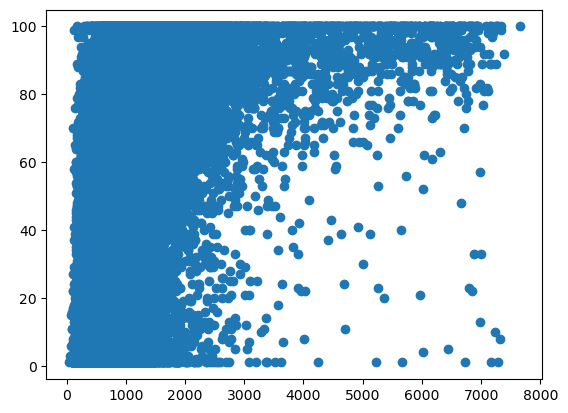

In [4]:
plt.scatter(X, y)
plt.show()

## 2. Train-test split
> __RECAP__: The model is trained on the __train set__. It is used to fit the model.

> The __test set__ is used to evaluate the performance of the final model.

#### 2a. Split the data into train and test sets

> The __test_size__ argument is used to specify the size of the split. In this problem, we will use a train-test split of 0.7 and 0.3 respectively. 

> The __random_state__ argument controls the shuffling applied to the data before applying the split. To get a reproducible output, we pass a fixed value. Here, pass a value of 1.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 2b. Print dimensions of the train and test sets

> Check the dimensions of the original data set. Do the train and test sets combined make that data set?

In [6]:
dataset.shape, X_train.shape, X_test.shape

((131307, 42), (91914,), (39393,))

## 3. Linear regression model

#### 3a. Fit the linear regression model
> __HINT__: You can find the code in the assignment instructions. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

>__HINT__: check shape of X_train, y_train -> X_train.to_numpy().reshape(-1, 1) LinearRegression expects the array to 2 dimensional

In [7]:
model = LinearRegression()
model.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

LinearRegression()

#### 3b. Print the slope and intercept of the regression line

In [9]:
print('slope= ',model.coef_)
print('intercept= ',model.intercept_)

slope=  [[0.0283845]]
intercept=  [11.00889915]


## 4. Evaluate the model

> __RECAP__: Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. The lower its value, the better is our model.

Think about the data you are trying to predict. You are trying to predict a value 1-100 so how does your RMSE relate to that? How poor or how good of a performance does this model have?

#### 4a. Assign predicted values of the train set to “train_pred” and predicted values of the test set to “test_pred” 

In [10]:
train_pred = model.predict(X_train.to_numpy().reshape(-1, 1))
test_pred = model.predict(X_test.to_numpy().reshape(-1, 1))

#### b.	Print the Root Mean Squared Error of the train set
> __HINT__: Check the assignment instructions for how to do this.

In [11]:
mean_squared_error(y_train, train_pred, squared=False)

21.328461173586657

#### c.	Print the Root Mean Squared Error of the test set
> __HINT__: Check the assignment instructions for how to do this.

In [12]:
mean_squared_error(y_test, test_pred, squared=False)

21.25838705255251

## 5. Plot the points and the regression line

> __HINT__: You can find the code in the assignment instructions.

What do you think the model learned to do? Just predict the mean? 

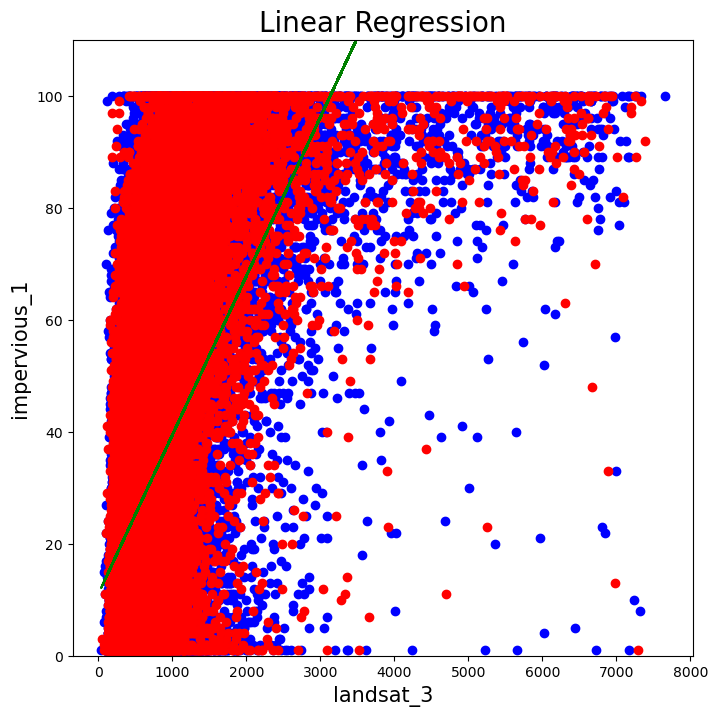

In [13]:
plt.figure(1, figsize=(8, 8))
plt.title('Linear Regression',fontsize=20)
plt.xlabel('landsat_3',fontsize=15)
plt.ylabel('impervious_1',fontsize=15)
# Plot training set examples in blue color
plt.scatter(X_train,y_train,c='b')
# Plot testing set examples in red color
plt.scatter(X_test,y_test,c='r')
# Regression line with final thetas
plt.plot(X, model.predict(X.to_numpy().reshape(-1, 1)),'g-')
plt.ylim(0, 110)
# Regression lines with 
plt.show()
plt.close()

## 6. Model prediction

> Now that you have created a linear regression model, you can use it for prediction

#### 6a. Assign x = 1500. You will get the predicted value of y (price) corresponding to x (area) = 1500 

> You can also change the value of x and run the cells below to get the predicted value for that particular x. 

In [14]:
x=1500

#### 6b. Print the predicted value of y (price) using the formula for linear regression

> __RECAP__: In linear regression, y = intercept + slope.x

> __HINT__: You can get the code in the assignment instructions

In [15]:
y_pred = model.intercept_ + model.coef_ * x
print("The predicted value is", y_pred[0].round(3))

The predicted value is [53.586]


#### 6c. Print the predicted value of y (price) using the predict() function 

> Is this value the same as the one above?

> __HINT__: You can see how to do this in the assignment instructions

In [16]:
y_pred = model.predict([[x]])

In [17]:
print('The predicted price is', y_pred[0].round(3))

The predicted price is [53.586]


## Part 2: MULTIVARIATE LINEAR REGRESSION

### 1. Feature Selection

#### 1a. Assign the target and feature variables in the model

> __RECAP__: __Target variable__ is the dependent variable ie the variable whose value we want to predict.
> Here, the target variable is __'impervious_1'__

> __Feature variable__ is the independent variable ie the variable whose value is used to predict the value of the dependent variable

> Here, the numerical feature variables are: __landsat-{i}, dem-1, posidex-1__ and the categorical feature variables are:  __aspect-{i}, wetlands-{i}__

In [18]:
target = 'impervious_1'
features = [
    'landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5', 'landsat_6',  
    'aspect_1_0', 'aspect_1_1', 'aspect_1_2', 'aspect_1_3', 'aspect_1_4',
    'aspect_1_5', 'aspect_1_6', 'aspect_1_7', 'aspect_1_8', 'aspect_1_9', 
    'aspect_1_10', 'aspect_1_11', 'aspect_1_12', 'aspect_1_13', 'aspect_1_14',
    'aspect_1_15', 'aspect_1_16', 'aspect_1_17','aspect_1_18', 
    'wetlands_1_0', 'wetlands_1_2', 'wetlands_1_3', 'wetlands_1_4', 
    'wetlands_1_5', 'wetlands_1_6', 'wetlands_1_7', 'wetlands_1_8',
    'dem_1', 'posidex_1'
]

#### 1b. Assign the feature variable columns to variable "X" and the target variable column to the variable "y"

In [19]:
X = dataset[features]
y = dataset[target]

#### 1c. Print dimensions of X and y
> You will get this in the form __(rows,columns)__

In [20]:
dataset.shape

(131307, 42)

## 2. Train-test split
> __RECAP__: The model is trained on the __train set__. It is used to fit the model.

> The __test set__ is used to evaluate the performance of the final model.

#### 1a. Split the data into train and test sets

> The __test_size__ argument is used to specify the size of the split. In this problem, we will use a train-test split of 0.7 and 0.3 respectively. 

> The __random_state__ argument controls the shuffling applied to the data before applying the split. To get a reproducible output, we pass a fixed value. Here, pass a value of 1.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 1b. Print dimensions of the train and test sets

In [22]:
X_train.shape, X_test.shape

((91914, 35), (39393, 35))

#### 2a. Fit the linear regression model
> __HINT__: You can find the code in the assignment instructions

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 2b. Print the slope and intercept of the regression line

In [24]:
print('slope= ',model.coef_)
print('intercept= ',model.intercept_)

slope=  [-4.14270852e-03  5.48286703e-02 -1.45380771e-02 -1.44065329e-02
 -2.73211012e-02  3.70010471e-02  2.67185725e-01  3.13680500e-01
  5.35895164e-01  2.82261470e-01  1.75843710e-01  2.28039094e-01
 -1.34321164e-01  4.48586169e-01 -4.36622628e-02  2.56959430e-01
 -4.71844953e-02 -3.66242491e-01 -5.24612944e-01 -6.04983355e-01
 -5.03639173e-01 -5.58146935e-02 -9.40235501e-02 -5.35051567e-01
  4.01084433e-01 -2.07110893e-01  3.92252536e-01 -3.16249175e-01
 -5.94956905e+00  3.28888480e+00  1.51688178e+01 -4.95200652e+00
 -7.42501953e+00  8.20103187e-04  4.51482341e-03]
intercept=  55.86079372291476


## 3. Model evaluation

#### 3a. Print the R^2 values of the training and testing sets

Think about what this tells us, how well can we expect our outputs to match up with ground truth?

In [25]:
print('R-squared on training set   :',model.score(X_train,y_train).round(3))
print('R-squared on testing set    :',model.score(X_test,y_test).round(3))

R-squared on training set   : 0.666
R-squared on testing set    : 0.66


## 4. Model prediction

#### 4a. Print the summary statistics of the dataframe X

> You will need to pass values for all the columns in X to get the predicted y (impervious) value. Looking at the summary statistics will help you better understand what values you can give to the variables.
Make sure that you set the variables to values which are valid and within their range of encoded values, one-hot encoded values must be either 0 or 1, etc.

> __HINT__: You can see how to do this in the assignment instructions

In [26]:
X.describe()

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,aspect_1_0,aspect_1_1,aspect_1_2,aspect_1_3,...,wetlands_1_0,wetlands_1_2,wetlands_1_3,wetlands_1_4,wetlands_1_5,wetlands_1_6,wetlands_1_7,wetlands_1_8,dem_1,posidex_1
count,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,...,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000,131307.000000
mean,456.516020,720.112325,676.270488,2914.054666,1948.267274,1122.268112,0.023563,0.046258,0.049997,0.055496,...,0.993595,0.002841,0.002521,0.000518,0.000282,0.000008,0.000221,0.000015,271.999604,51.482488
std,413.535009,479.522254,570.427586,614.969542,634.205074,532.599305,0.151684,0.210044,0.217940,0.228947,...,0.079774,0.053222,0.050145,0.022751,0.016784,0.002760,0.014860,0.003903,129.208240,23.552578
min,3.000000,145.000000,38.000000,111.000000,47.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-213.522029,-1.000000
25%,262.000000,475.000000,359.000000,2542.000000,1506.000000,732.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.000000,37.000000
50%,365.000000,619.000000,548.000000,2903.000000,1845.000000,1023.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,288.000000,53.000000
75%,511.000000,805.000000,800.000000,3267.000000,2273.000000,1391.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,320.000000,68.000000
max,6303.000000,7262.000000,7653.000000,8044.000000,7855.000000,8327.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1178.000000,100.000000


### 4b. Create a new variable called 'inputs' and assign it the value:

inputs ={
    'landsat_1': 456, 'landsat_2': 720, 'landsat_3': 676, 'landsat_4': 2914, 'landsat_5': 1948, 'landsat_6': 1122,
    'aspect_1_0': 0, 'aspect_1_1': 0, 'aspect_1_2': 0, 'aspect_1_3': 0, 'aspect_1_4': 0, 'aspect_1_5': 0, 'aspect_1_6': 0, 
    'aspect_1_7': 0, 'aspect_1_8': 0, 'aspect_1_9': 0, 'aspect_1_10': 0, 'aspect_1_11': 1, 'aspect_1_12': 0.,
    'aspect_1_13': 0, 'aspect_1_14': 0, 'aspect_1_15': 0, 'aspect_1_16': 0, 'aspect_1_17': 0, 'aspect_1_18': 0,
    'wetlands_1_0': 1, 'wetlands_1_2': 0, 'wetlands_1_3': 0, 'wetlands_1_4': 0, 'wetlands_1_5': 0, 'wetlands_1_6': 0,
    'wetlands_1_7': 0, 'wetlands_1_8': 0, 'dem_1': 756, 'posidex_1': 51
}

> You will get the predicted value of impervious corresponding to the values of these inputs. 

> You can also do this by changing the values in 'inputs'

> __HINT__: You can check the assignment instructions for the code

In [27]:
inputs ={'landsat_1': 456, 'landsat_2': 720, 'landsat_3': 676, 'landsat_4': 2914, 'landsat_5': 1948, 'landsat_6': 1122, 
         'aspect_1_0': 0, 'aspect_1_1': 0, 'aspect_1_2': 0, 'aspect_1_3': 0, 'aspect_1_4': 0, 'aspect_1_5': 0, 'aspect_1_6': 0, 
         'aspect_1_7': 0, 'aspect_1_8': 0, 'aspect_1_9': 0, 'aspect_1_10': 0, 'aspect_1_11': 1, 'aspect_1_12': 0., 'aspect_1_13': 0, 
         'aspect_1_14': 0, 'aspect_1_15': 0, 'aspect_1_16': 0, 'aspect_1_17': 0, 'aspect_1_18': 0, 'wetlands_1_0': 1, 'wetlands_1_2': 0, 
         'wetlands_1_3': 0, 'wetlands_1_4': 0, 'wetlands_1_5': 0, 'wetlands_1_6': 0, 'wetlands_1_7': 0, 'wetlands_1_8': 0, 'dem_1': 756, 'posidex_1': 51}

#### 4c. Convert the dictionary 'inputs' to a dataframe called 'inputs_df' and transpose it

> Transpose means changing the row elements into column elements and vice versa.

> __HINT__: You can check the assignment instructions for the code

In [28]:
inputs_df = pd.DataFrame.from_dict(inputs, orient='index').transpose()

#### 4d. Print the predicted value of y (impervious)

> __HINT__: You can see how to do this in the assignment instructions

In [29]:
y_pred = model.predict(inputs_df)
print("The predicted value of ADR is", y_pred[0].round(3))

The predicted value of ADR is 30.211000000000002
